# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [105]:
%pip install --upgrade plotly

###  Import Statements


In [106]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from random import randint

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [107]:
pd.options.display.float_format = '{:,.2f}'.format

#random color
color = []
for i in range(50):
    color.append('#%06X' % randint(0, 0xFFFFFF))

# Load the Data



In [108]:
df_data = pd.read_csv('NLSY97_subset.csv')

In [109]:
df_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


In [110]:
# df_var= pd.read_csv('NLSY97_Variable_Names_and_Descriptions.csv')

In [111]:
#Copy The original dataset into new data as backup 
df_data_ori = df_data

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [112]:
#Full Dataset Summary
print(df_data_ori.shape)
print(df_data_ori.info())
print(df_data_ori.count())
print(f'Any NaN values? {df_data_ori.isna().values.any()}')
print(f'Any duplicates? {df_data_ori.duplicated().values.any()}')

(2000, 96)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [113]:
#Data Cleaning for the whole data
print(df_data.shape)
print(df_data.info())
print(df_data.count())
print(f'Any NaN values? {df_data.isna().values.any()}')
print(f'Any duplicates? {df_data.duplicated().values.any()}')


(2000, 96)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-

In [114]:
#Put Out duplicated rows
duplicated_rows = df_data[df_data.duplicated()]
df_data = df_data.drop_duplicates()

In [115]:
df_data.fillna(0)

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,0.00,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2400,9.00,12,10.83,1,0,1982,29,29.00,"73,100.00",...,0,0,0,1,0,0,0,1,0,0
1989,3018,8.00,12,9.37,1,0,1982,29,23.00,"66,300.00",...,1,0,1,0,0,0,1,0,0,0
1991,4550,8.57,17,6.29,1,0,1984,27,25.00,"76,300.00",...,0,0,0,0,1,0,1,0,0,0
1994,3779,9.33,12,9.12,1,0,1984,27,22.00,0.00,...,1,0,0,1,0,0,1,0,0,0


In [116]:
print(df_data.shape)

(1487, 96)


### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

In [117]:
#Based on the question, here is the subset for the key variables: 
df_data_2 = df_data[['EARNINGS','S', 'EXP']]

In [118]:
df_data_2.shape

(1487, 3)

In [119]:
print(df_data_2.shape)
print(df_data_2.info())
print(df_data_2.count())
print(f'Any NaN values? {df_data_2.isna().values.any()}')
# print(f'Any duplicates? {df_data_2.duplicated().values.any()}')


(1487, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1995
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EARNINGS  1487 non-null   float64
 1   S         1487 non-null   int64  
 2   EXP       1487 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 46.5 KB
None
EARNINGS    1487
S           1487
EXP         1487
dtype: int64
Any NaN values? False


## Descriptive Statistics

In [120]:
df_data_2.describe()

,EARNINGS,S,EXP
count,"1,487.00","1,487.00","1,487.00"
mean,18.81,14.56,6.70
std,12.00,2.77,2.86
min,2.00,6.00,0.00
25%,11.41,12.00,4.65
50%,15.75,15.00,6.63
75%,22.60,16.00,8.71
max,132.89,20.00,14.73


## Visualise the Features

In [121]:
box = px.box(df_data_2,
             y=['EARNINGS', 'EXP','S'],
             points="all",
             color_discrete_sequence = ['red', 'green', 'blue'],
             title='Features of the key variables ')

box.update_layout(xaxis_title='Category',
                  yaxis_title='Number of people',
                  xaxis={'categoryorder':'max descending'},
                  # yaxis=dict(type='log'))

)
box.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [122]:
#Based on the question 20% training
X_train, X_test, y_train, y_test = train_test_split(
    df_data_2[['S']]
    # , 'EXP']]
    , df_data_2.EARNINGS
    , test_size=0.2
    , random_state=12)
# Refercnece Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time you run the code. 

In [ ]:
print(X_train, X_test, y_train, y_test)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [124]:
#Predict Earnings from only on the training data: 
regression = LinearRegression().fit(X_train, y_train)
rsquared = regression.score(X_train, y_train)

print(f'The r-squared is {rsquared:.2}')

The r-squared is 0.079


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [125]:
coef = pd.DataFrame(data=regression.coef_, index=X_train.columns, columns=['Coefficient'])
coef

,Coefficient
S,1.22


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [126]:
# Using X_test to predict
predict_test = regression.predict(X_test)
residuals_test = (y_test - predict_test)

In [127]:
# Using train to predict
predict_train = regression.predict(X_train)
residuals_train = (y_train - predict_train)

Text(0, 0.5, 'Prediced prices')

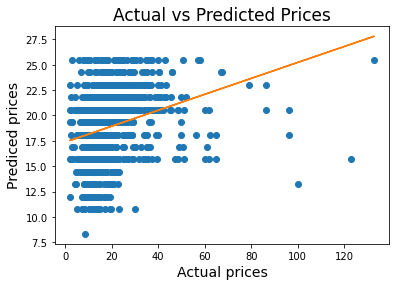

In [128]:
x=  y_train
y=  predict_train

#create basic scatterplot
plt.plot(x, y, 'o')

# #obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# #add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.title(f'Actual vs Predicted Prices', fontsize=17)
plt.xlabel('Actual prices', fontsize=14)
plt.ylabel('Prediced prices', fontsize=14)

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [129]:
#Based on the question 20% training
X_train, X_test, y_train, y_test = train_test_split(
    df_data_2[['S', 'EXP']]
    , df_data_2.EARNINGS
    , test_size=0.2
    , random_state=12)

In [130]:
regression = LinearRegression().fit(X_train, y_train)
rsquared = regression.score(X_train, y_train)

print(f'The r-squared is: {rsquared:.2}')

The r-squared is: 0.1


### Evaluate the Coefficients of the Model

In [131]:
coef = pd.DataFrame(data=regression.coef_, index=X_train.columns, columns=['Coefficient'])
coef

,Coefficient
S,1.73
EXP,0.83


### Analyse the Estimated Values & Regression Residuals

In [132]:
# Using X_test to predict
predict_test = regression.predict(X_test)
residuals_test = (y_test - predict_test)

In [133]:
# Using train to predict
predict_train = regression.predict(X_train)
residuals_train = (y_train - predict_train)

Text(0, 0.5, 'Prediced prices')

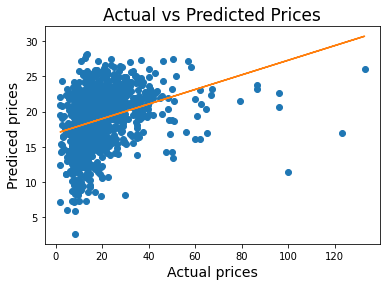

In [134]:
x=  y_train
y=  predict_train

#create basic scatterplot
plt.plot(x, y, 'o')

# #obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# #add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.title(f'Actual vs Predicted Prices', fontsize=17)
plt.xlabel('Actual prices', fontsize=14)
plt.ylabel('Prediced prices', fontsize=14)

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [135]:
#From the Question 
year_S = 12+4
year_EXP  = 5

In [136]:
new_features = pd.DataFrame(columns=['S', 'EXP'], data=[[year_S , year_EXP]])

In [137]:
new_prediction = regression.predict(new_features)

In [138]:
new_prediction 

array([19.85283434])

# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 